In [7]:
import time
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import re
import pandas as pd

from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen

## 스타벅스 매장조회

In [8]:
options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ["enable-logging"])
wd = webdriver.Chrome('./chromedriver.exe', options=options)

C:\Users\admin\AppData\Local\Temp\ipykernel_2480\1991402379.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('./chromedriver.exe', options=options)


In [9]:
# 스타벅스의 매장 홈페이지를 연다
star_url ="https://www.starbucks.co.kr/store/store_map.do"
wd.get(star_url)

In [10]:
# 셀레니움 4버전으로 변경되면서 함수 원형이 수정됨
# 새 패키지 추가 해야함
from selenium.webdriver.common.by import By

In [11]:
# 지역검색 > 서울 > 전체 순으로 들어가도록 한다.(find_element_by_xpath는 3버전 4는 find_element로 통일)
# 오류가 발생하여 각 코드마다 2초에 텀을 준다.

# 지역검색
wd.find_element(By.XPATH,'//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(2)
# 서울
wd.find_element(By.XPATH,'//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(2)
# 전체
wd.find_element(By.XPATH,'//*[@id="mCSB_2_container"]/ul/li[1]/a').click()

In [12]:
req = wd.page_source
soup = BeautifulSoup(req, "html.parser")
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(info), info[0]

(588,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

In [13]:
# 주소를 soup에 담고 서울에 있는 총 매장의 수와 표본을 확인한다.
# 총 585개의 매장이 수집되었다.

name = info[0].find("strong").text.strip()
address = info[0].find(class_="result_details").text.strip()[:-9]
place = address.split(" ")[1]

name, address, place

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [14]:
star_info = []
for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]
   
    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

588

In [15]:
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [16]:
gu_list = list(set(df_star["구"]))
gu_list

['영등포구',
 '서초구',
 '은평구',
 '강북구',
 '강동구',
 '동대문구',
 '동작구',
 '용산구',
 '강남구',
 '노원구',
 '광진구',
 '강서구',
 '중구',
 '성동구',
 '중랑구',
 '도봉구',
 '종로구',
 '금천구',
 '성북구',
 '구로구',
 '양천구',
 '마포구',
 '송파구',
 '관악구',
 '서대문구']

## 이디야

In [17]:
options2 = webdriver.ChromeOptions()
options2.add_experimental_option("excludeSwitches", ["enable-logging"])
wd = webdriver.Chrome('./chromedriver.exe', options=options2)

C:\Users\admin\AppData\Local\Temp\ipykernel_2480\1462795729.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('./chromedriver.exe', options=options2)


In [18]:
edi_url = "https://www.ediya.com/contents/find_store.html"
wd.get(edi_url)

In [19]:
edi_info = []



for gu in gu_list:
    wd.find_element(By.XPATH,'//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    wd.find_element(By.XPATH,'//*[@id="keyword"]').clear
    wd.find_element(By.XPATH,'//*[@id="keyword"]').send_keys("서울 " + gu)
    wd.find_element(By.XPATH,'//*[@id="keyword_div"]/form/button').click()
    
    html = wd.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]
        

        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)


698

In [20]:
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
693,신림역점,관악구,서울 관악구 신림로 312 (신림동)
694,신림중앙점,관악구,서울 관악구 관천로 52 (신림동)
695,신림패션문화점,관악구,서울 관악구 봉천로6길 24 (신림동)
696,인헌점,관악구,서울 관악구 인헌길 17 (봉천동)
697,청룡중앙점,관악구,"서울 관악구 쑥고개로 80 (봉천동, 제이빌딩)"


In [21]:
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,영등포구,41
1,서초구,48
2,은평구,10
3,강북구,6
4,강동구,17
5,동대문구,9
6,동작구,11
7,용산구,24
8,강남구,89
9,노원구,13


In [22]:
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,영등포구,41
1,서초구,29
2,은평구,27
3,강북구,20
4,강동구,27
5,동대문구,25
6,동작구,22
7,용산구,14
8,강남구,44
9,노원구,31


In [23]:
from matplotlib import rc
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = './NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

C:\Users\admin\AppData\Local\Temp\ipykernel_2480\3681494351.py:4: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [24]:
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,영등포구,41,41,0
1,서초구,29,48,-19
2,은평구,27,10,17
3,강북구,20,6,14
4,강동구,27,17,10
5,동대문구,25,9,16
6,동작구,22,11,11
7,용산구,14,24,-10
8,강남구,44,89,-45
9,노원구,31,13,18


In [25]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXGeneral',
 'cmr10',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'cmex10',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'cmss10',
 'cmb10',
 'STIXSizeTwoSym',
 'cmtt10',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'cmsy10',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'cmmi10',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXGeneral',
 'MT Extra',
 'Papyrus',
 'Constantia',
 'Bookshelf Symbol 7',
 'Footlight MT Light',
 'Kristen ITC',
 'Goudy Stout',
 'Yu Gothic',
 'Goudy Old Style',
 'HYSinMyeongJo-Medium',
 'Verdana',
 'Bodoni MT',
 'Agency FB',
 'Palatino Linotype',
 'Times New Roman',
 'Parchment',
 'Microsoft PhagsPa',
 'Trebuchet MS',
 'Bookman Old Style',
 'Comic 

In [27]:
# matplotlib unicode minus 깨져서 나올때
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

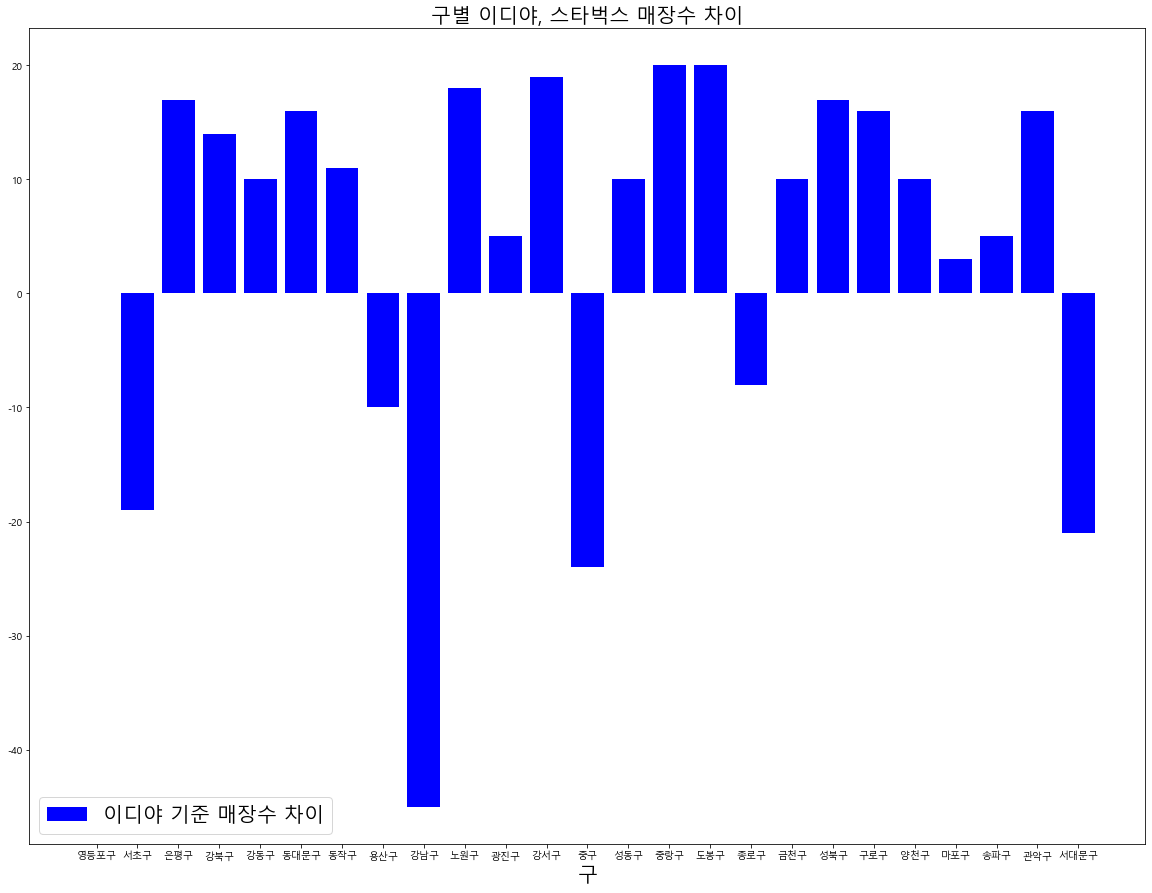

In [28]:
a = sum_data["매장 수 차이"]
y = "ediya"

plt.rcParams['font.family'] =  'Malgun Gothic',
plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()

# 마이너스는 이디야수<스벅수
# 플러스는 이디야수>스벅수